In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge

In [26]:
df = pd.read_csv("data.csv")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [28]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [29]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [30]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [31]:
values = ["Price", "Mileage",	"Make",	"Model",	"Type",	"Cylinder",	"Liter",	"Doors"]

for i in values:
  print(df.value_counts(i, normalize=True).sort_values(ascending=True).head(),"\n")

Price
31024.872115    0.001244
10770.106554    0.001244
12408.806148    0.001244
10563.066162    0.001244
8870.947316     0.001244
Name: proportion, dtype: float64 

Mileage
27015    0.001244
2992     0.001244
2973     0.001244
2879     0.001244
1676     0.001244
Name: proportion, dtype: float64 

Make
Saturn      0.074627
Buick       0.099502
Cadillac    0.099502
SAAB        0.141791
Pontiac     0.186567
Name: proportion, dtype: float64 

Model
9-2X AWD    0.004975
CTS         0.012438
Century     0.012438
Classic     0.012438
L Series    0.012438
Name: proportion, dtype: float64 

Type
Convertible    0.062189
Hatchback      0.074627
Wagon          0.079602
Coupe          0.174129
Sedan          0.609453
Name: proportion, dtype: float64 

Cylinder
8    0.124378
6    0.385572
4    0.490050
Name: proportion, dtype: float64 

Liter
2.5    0.004975
2.8    0.012438
3.0    0.012438
3.1    0.012438
3.4    0.012438
Name: proportion, dtype: float64 

Doors
2    0.236318
4    0.763682
Name: pro

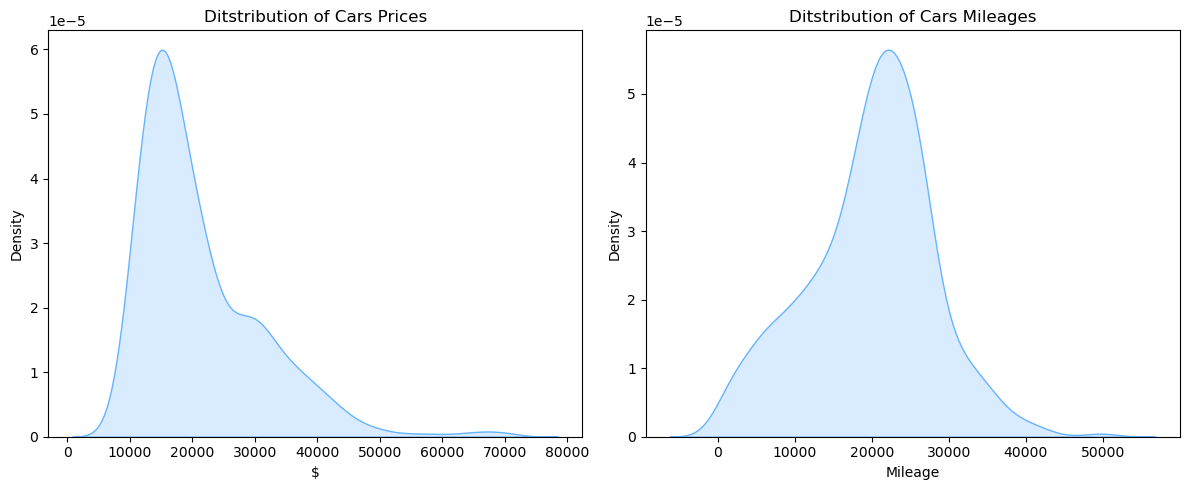

In [32]:
fix, ax = plt.subplots(1,2,figsize=(12,5))

sns.kdeplot(data=df, x='Price',fill=True, color='#66b3ff', ax=ax[0])
ax[0].set_title("Ditstribution of Cars Prices")
ax[0].set_xlabel("$")
sns.kdeplot(data=df, x='Mileage',fill=True, color='#66b3ff', ax=ax[1])
ax[1].set_title("Ditstribution of Cars Mileages")
ax[1].set_xlabel("Mileage")
plt.tight_layout()
plt.show()



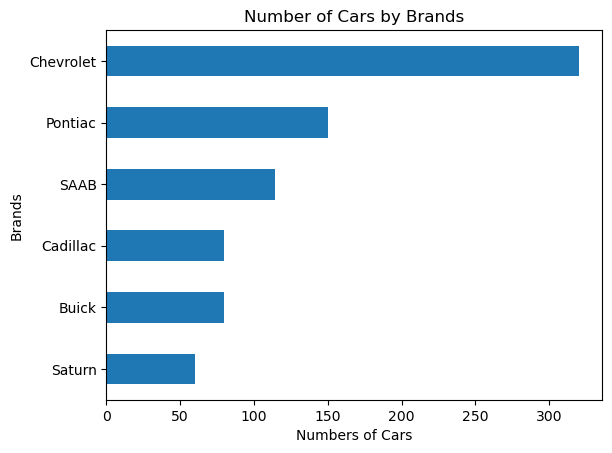

In [33]:
car_makers = df.groupby("Make").size()
car_makers.sort_values(ascending=True).plot(kind="barh")
plt.title("Number of Cars by Brands")
plt.xlabel("Numbers of Cars")
plt.ylabel("Brands")
plt.show()

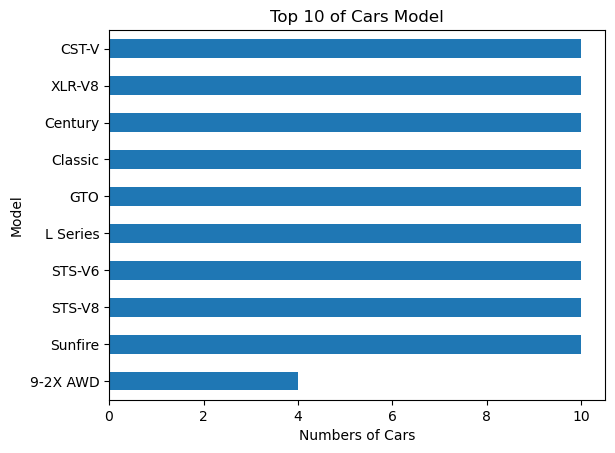

In [34]:
car_model = df.groupby("Model").size()
car_model.sort_values(ascending=True).head(10).plot(kind="barh")
plt.title("Top 10 of Cars Model")
plt.xlabel("Numbers of Cars")
plt.ylabel("Model")
plt.show()

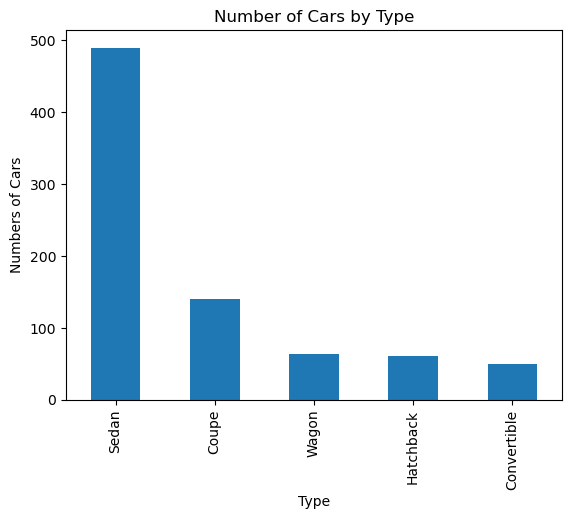

In [35]:
car_types = df.groupby("Type").size()
car_types.sort_values(ascending=False).plot(kind="bar")
plt.title("Number of Cars by Type")
plt.ylabel("Numbers of Cars")
plt.xlabel("Type")
plt.show()

In [36]:
ls = ["Doors", "Cruise","Sound","Leather","Cylinder", "Liter"]

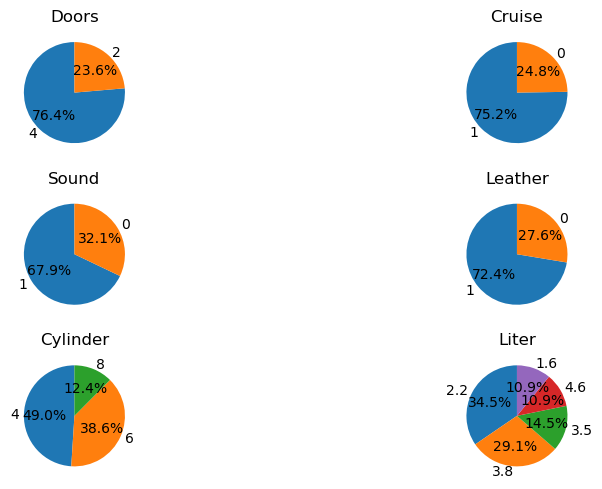

In [37]:
fix, ax = plt.subplots(3,2,figsize=(12,5))
ax = ax.flatten()

for index, column in enumerate(ls):
  df[column].value_counts().head(5).plot(kind="pie",ax=ax[index], autopct='%1.1f%%', startangle=90)
  ax[index].set_title(column)
  ax[index].set_ylabel('')  # Remove the y-label for clarity

plt.tight_layout()
plt.show()

In [38]:
df.drop(["Cruise","Sound","Leather","Trim"], axis=1, inplace=True)

In [39]:
scaler = StandardScaler()
scaler.fit(df[["Price","Mileage","Cylinder","Liter","Doors"]])
df[["Price","Mileage","Cylinder","Liter","Doors"]] = scaler.transform(df[["Price","Mileage","Cylinder","Liter","Doors"]])

In [40]:
df  = pd.get_dummies(df, columns=["Make", "Model", "Type"], dtype=int)

In [41]:
df

,Price,Mileage,Cylinder,Liter,Doors,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,-0.407851,-1.417485,0.52741,0.056736,0.556279,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.384778,-1.305902,0.52741,0.056736,0.556279,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-0.518721,-0.810128,0.52741,0.056736,0.556279,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.506770,-0.426058,0.52741,0.056736,0.556279,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.506542,0.000008,0.52741,0.056736,0.556279,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,-0.489545,-0.439853,0.52741,-0.033772,0.556279,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,-0.523063,-0.089966,0.52741,-0.033772,0.556279,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,-0.568092,0.079605,0.52741,-0.033772,0.556279,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,-0.630068,0.750446,0.52741,-0.033772,0.556279,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
X = df.drop(["Price"], axis = 1)
y = df["Price"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state=42, test_size=0.30, shuffle=True) 
  

In [44]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = regression.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"MSE: {mse} \nRMSE: {rmse} \nMAE: {mae} \nR-squared: {r2}")

MSE: 0.01974047774849633 
RMSE: 0.14050081049053179 
MAE: 0.10290339460094329 
R-squared: 0.9787059222887224
